In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model

# Declare a Base using `automap_base()`
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [192]:
# Find the most recent date in the data set.
#recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#recent_date
first_row = session.query(Measurement).first()
print(first_row.__dict__)




{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000001BD3CABABE0>, 'id': 1, 'date': '2010-01-01', 'tobs': 65.0, 'prcp': 0.08, 'station': 'USC00519397'}
2017-08-23


2017-08-23
2016-08-23


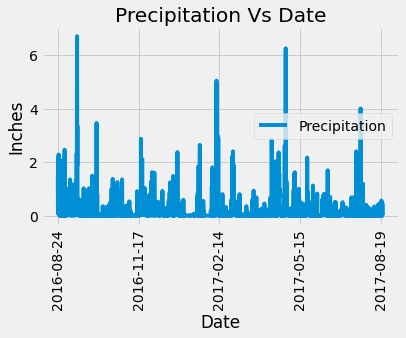

In [239]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date_str = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
print(date_str)

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8, 23) - dt.timedelta(days=365)
print(year_ago)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date,Measurement.prcp).\
            filter(Measurement.date > year_ago).\
            order_by(Measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['Date', 'Precipitation'])
df.set_index('Date', inplace=True, )
df = df.dropna() 


# Sort the dataframe by date
df.sort_values(by=['Date'], inplace=True, ascending=True)


# Use Pandas Plotting with Matplotlib to plot the data
df.plot(title="Precipitation Vs Date")
plt.tight_layout()
plt.ylabel('Inches')
plt.xticks(rotation = 90)
plt.show()


In [240]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [90]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurement.station).distinct().count()
#session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all()

9

In [101]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).\
all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [227]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).\
first().station
type(most_active)
print('Station with highest number of observations is: ' + most_active)


min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active).all()
print('Lowest Temperature at ' + most_active +' ' + str(min_temp))

max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active).all()
print('Highest Temperature at ' + most_active +' ' + str(max_temp))

avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active).all()
print('Average Temperature at ' + most_active +' ' + str(avg_temp))

Station with highest number of observations is: USC00519281
Lowest Temperature at USC00519281 [(54.0,)]
Highest Temperature at USC00519281 [(85.0,)]
Average Temperature at USC00519281 [(71.66378066378067,)]


Text(0.5, 0, 'Temperature')

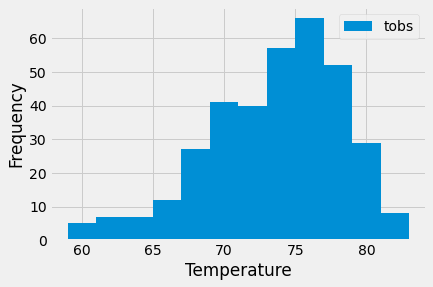

In [237]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_of_mostactive = session.query(Measurement.tobs).\
            filter(Measurement.date > year_ago ).\
            filter(Measurement.station == most_active).all()
df_tobs = pd.DataFrame(tobs_of_mostactive, columns=['tobs'])
df_tobs.plot.hist(bins=12)
plt.xlabel('Temperature')

# Close session

In [241]:
# Close Session
session.close()